# Importing necessary libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading MNIST dataset

In [2]:
mnist = tf.keras.datasets.mnist

# Loading the dataset on training and testing axes

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

# Normalizing the pixel values(between 0 and 1)

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Training dataset visualization

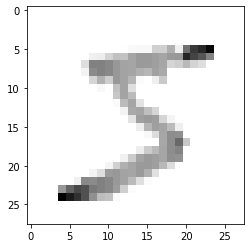

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [6]:
plt.imshow(x_train[0], cmap=plt.cm.binary)       
plt.show()
print(x_train[0])

# Creating model

In [7]:
model = tf.keras.models.Sequential()

# Adding layers to the NN

In [8]:
model.add(tf.keras.layers.Flatten())                            #input layer
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))    #first dense layer
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))    #second dense layer
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))   #third dense layer
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax)) #resulting layer containg 10 outputs(as 0 to 9 are 10 outputs)

# Training the model

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
train=model.fit(x_train, y_train, epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2079 - accuracy: 0.9364 - val_loss: 0.1040 - val_accuracy: 0.9709
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0878 - accuracy: 0.9729 - val_loss: 0.0949 - val_accuracy: 0.9724
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0604 - accuracy: 0.9810 - val_loss: 0.0920 - val_accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0446 - accuracy: 0.9858 - val_loss: 0.0862 - val_accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.0956 - val_accuracy: 0.9745


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


# Model Performance

In [11]:
loss, acc = model.evaluate(x_test, y_test)
print("Accuracy attained by the model: {:.2f}".format(acc*100))
print("Loss of the model: {:.2f}".format(loss*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0956 - accuracy: 0.9745
Accuracy attained by the model: 97.45
Loss of the model: 9.56


Text(0.5, 1.0, 'Training and Validation Accuracy')

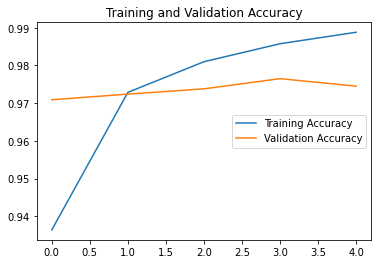

In [12]:
# Plotting of Training-Validation Accuracy of model
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'Training Accuracy' )
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'center right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

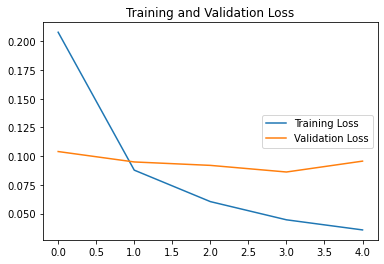

In [13]:
# Plotting of Training-Validation Loss of model
loss = train.history['loss']
val_loss = train.history['val_loss']

plt.plot(epochs, loss, label = 'Training Loss' )
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.legend(loc = 'center right')
plt.title('Training and Validation Loss')

In [15]:
x_test=tf.convert_to_tensor(x_test) 
predictions=model.predict([x_test]) 

'predictions' contains the probability of number-predictions of the corresponding images

# List of numerical predicted values

In [16]:
import numpy as np          

p=[]
for i in predictions:
    n=np.argmax(i)
    p.append(n)

# Dictionary to determine frequency of all the digits in the testing dataset.

In [17]:
d={}                     
for i in p:
    if i in d:
        d[i]+=1
    else:
        d[i]=1

for number, freq in sorted(d.items()):
    print("Total no. of predicted {0} in the dataset: {1}".format(number,freq))

Total no. of predicted 0 in the dataset: 1012
Total no. of predicted 1 in the dataset: 1129
Total no. of predicted 2 in the dataset: 1036
Total no. of predicted 3 in the dataset: 1050
Total no. of predicted 4 in the dataset: 976
Total no. of predicted 5 in the dataset: 865
Total no. of predicted 6 in the dataset: 953
Total no. of predicted 7 in the dataset: 1015
Total no. of predicted 8 in the dataset: 954
Total no. of predicted 9 in the dataset: 1010
